In [1]:
import os
import time
import pickle
import codecs
import matplotlib

import pandas as pd
import numpy as np
from pprint import pprint
import matplotlib.pyplot as plt
from collections import defaultdict

%matplotlib inline

# from IPython.display import set_matplotlib_formats
# set_matplotlib_formats('pdf', 'svg')

In [2]:
results = ["avg", "min", "max", "concat"]
sgm = {}
eam = {}

In [3]:
for method in results:
    with codecs.open('results_'+str(method)+'/skipgram.pkl', 'rb') as s:
        sgm[method] = pickle.load(s)
    with codecs.open('results_'+str(method)+'/embed_align.pkl', 'rb') as e:
        eam[method] = pickle.load(e)

In [4]:
def splitting(model_dict, base):
    STS = {}
    ClassificationTask = {}
    STS_updated_dict = {}
    
    # splitting
    for key, value in model_dict.items():
        for task, scores in value.items():
            if task.find("STS") == 0 or task.find("Relatedness") > 0:
                STS[key, task] = model_dict[key][task]
            else:
                ClassificationTask[key, task] = model_dict[key][task]
    
    
    for key, subtasks in STS.items():
        for sets, scores in subtasks.items():
            if sets == 'pearson':
                print('p')
                STS_updated_dict[key] = {'pearson': scores }
            elif sets == 'spearman':
                print('s')
                STS_updated_dict[key] = {'spearman': scores}
            try:
                if isinstance(scores['pearson'], dict):
                    STS_updated_dict[key] = {'pearson': round(scores['pearson']['mean'], 3), 'spearman': round(scores['spearman']['mean'], 3)}
            except:
                continue
    
    
    # dataframes
    ClassificationTask_df = pd.DataFrame.from_dict(ClassificationTask, orient = 'index')
    ClassificationTask_df = ClassificationTask_df.drop(columns = ['ndev', 'ntest', 'devacc'])
    
    #dropping min and max
#     ClassificationTask_df.drop(ClassificationTask_df.loc['max':'min'].index , inplace = True)
#     ClassificationTask_df.rename({'concat': str(base)+'-concat', 'avg': str(base)+'-avg'}, axis = 'index')
    
    STS_updated_df = pd.DataFrame.from_dict(STS_updated_dict, orient = 'index')
#     STS_updated_df.drop(STS_updated_df.loc['max':'min'].index , inplace = True)
    
    return STS_updated_df, ClassificationTask_df

In [5]:
STS_sgm, ClassificationTask_sgm = splitting(sgm, base = "SGM")
STS_eam, ClassificationTask_eam = splitting(eam, base = "EAM")

In [6]:
pprint(ClassificationTask_sgm)
print('*'*32)
pprint(STS_eam)

                         acc     f1
avg    CR              75.73    NaN
       MPQA            87.59    NaN
       MR              71.67    NaN
       MRPC            71.48  81.82
       SICKEntailment  77.78    NaN
       SST2            75.67    NaN
       SUBJ            87.67    NaN
       TREC            71.80    NaN
concat CR              75.74    NaN
       MPQA            87.31    NaN
       MR              70.94    NaN
       MRPC            72.17  80.86
       SICKEntailment  78.71    NaN
       SST2            76.11    NaN
       SUBJ            88.18    NaN
       TREC            72.20    NaN
max    CR              71.18    NaN
       MPQA            86.21    NaN
       MR              67.13    NaN
       MRPC            71.71  80.27
       SICKEntailment  76.25    NaN
       SST2            70.18    NaN
       SUBJ            82.38    NaN
       TREC            68.80    NaN
min    CR              70.25    NaN
       MPQA            86.25    NaN
       MR              66.88

In [7]:
# ClassificationTask_eam.rename({'concat': 'EAM-concat'}, axis = 'index')
# ClassificationTask_sgm.rename({'concat': 'SGM-concat', 'avg': 'SGM-avg'}, axis = 'index')
# STS_eam.rename({'concat': 'EAM-concat'}, axis = 'index')
# STS_sgm.rename({'concat': 'SGM-concat'}, axis = 'index')

In [8]:
STS_eam.to_csv("csv/STS_eam.csv")
# print('*'*32)
STS_sgm.to_csv("csv/STS_sgm.csv")
ClassificationTask_sgm.to_csv("csv/ClassificationTask_sgm.csv")
ClassificationTask_eam.to_csv("csv/ClassificationTask_eam.csv")

In [9]:
best = pd.read_csv("csv/subset.csv")

In [10]:
plt.rcParams['figure.figsize'] = [12, 4]

In [11]:
a = list(best['Tasks'])
xx = a[:-1]

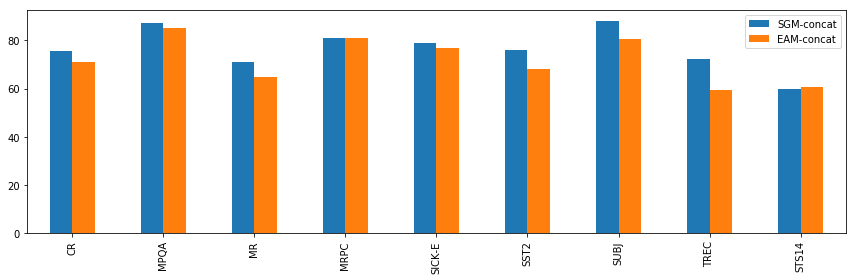

In [12]:
ax = best.plot(kind = 'bar')
ax.set_xticks(best['Tasks'].index)
ax.set_xticklabels(list(best['Tasks']), rotation=90)
plt.tight_layout()
# plt.savefig("best.eps", dpi = 300)

In [13]:
plt.rcParams['figure.figsize'] = [16, 4]

In [14]:
SGM = pd.read_csv("csv/SGM.csv")
EAM = pd.read_csv("csv/EAM.csv")

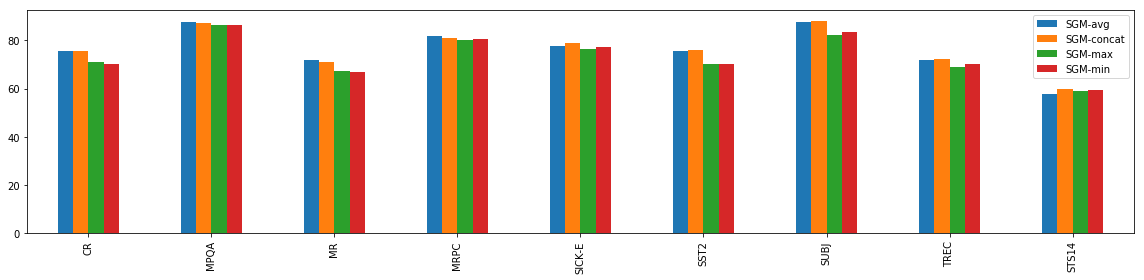

In [15]:
ax = SGM.plot(kind = 'bar')
ax.set_xticks(SGM['Tasks'].index)
ax.set_xticklabels(list(SGM['Tasks']), rotation=90)
plt.tight_layout()
# plt.savefig("SGM.eps", dpi = 300)

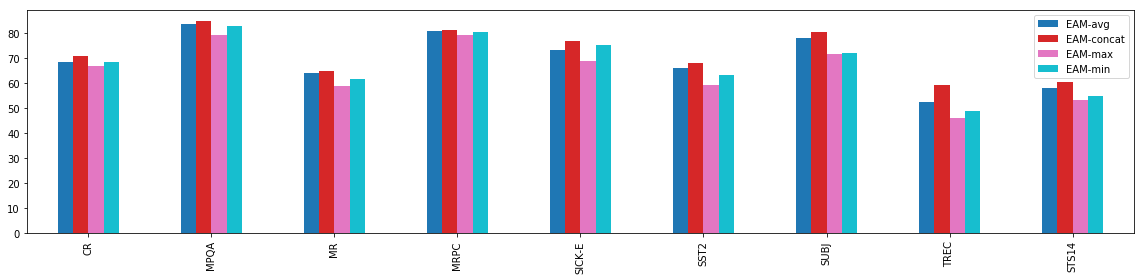

In [16]:
ax = EAM.plot(kind = 'bar', colormap="tab10")
ax.set_xticks(EAM['Tasks'].index)
ax.set_xticklabels(list(EAM['Tasks']), rotation=90)
plt.tight_layout()
plt.savefig("EAM.eps", dpi = 300)

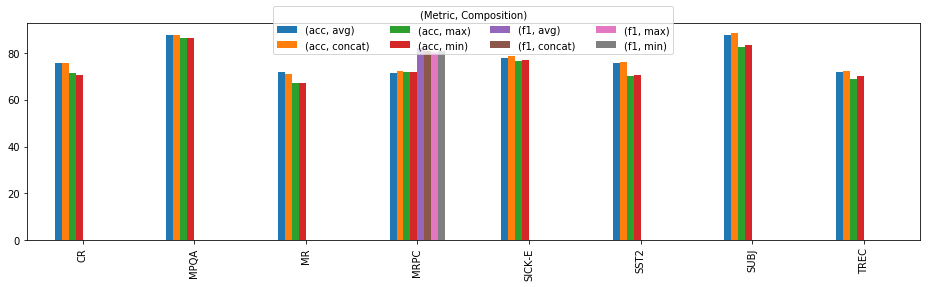

In [17]:
ax = ClassificationTask_sgm.unstack(level=0).plot(kind='bar', subplots=False)
ax.set_xticklabels(xx, rotation=90)
ax.legend(title = "(Metric, Composition)", loc= 9, ncol=4, fancybox=True, bbox_to_anchor=(0.5, 1.1))
# plt.tight_layout()
# plt.savefig("ClassificationTask_sgm.eps", dpi = 300)
plt.show()

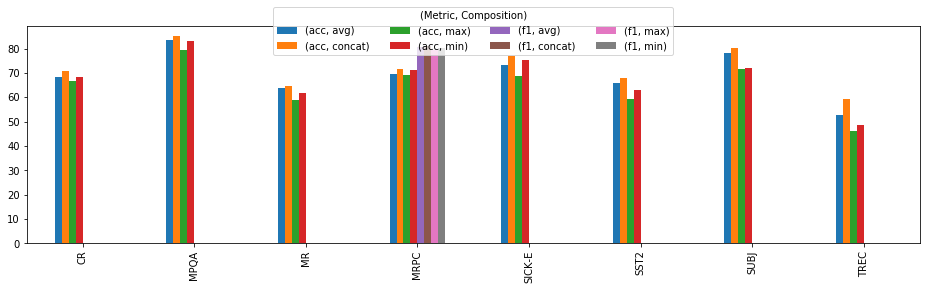

In [18]:
ax = ClassificationTask_eam.unstack(level=0).plot(kind='bar', subplots=False)
ax.set_xticklabels(xx, rotation=90)
ax.legend(title = "(Metric, Composition)", loc= 9, ncol=4, fancybox=True, bbox_to_anchor=(0.5, 1.11))
# plt.tight_layout()
# plt.savefig("ClassificationTask_eam.eps", dpi = 300)
plt.show()

In [19]:
plt.rcParams['figure.figsize'] = [8, 6]

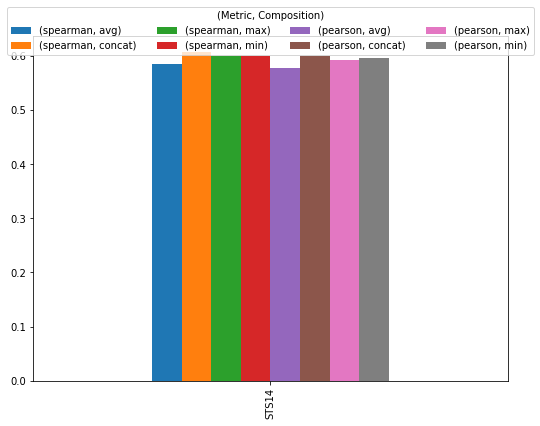

In [20]:
ax = STS_sgm.unstack(level=0).plot(kind='bar', subplots=False)
ax.legend(title = "(Metric, Composition)", loc= 9, ncol=4, fancybox=True, bbox_to_anchor=(0.5, 1.1))
plt.tight_layout()

# plt.savefig("STS_sgm.eps", dpi = 300)
plt.show()

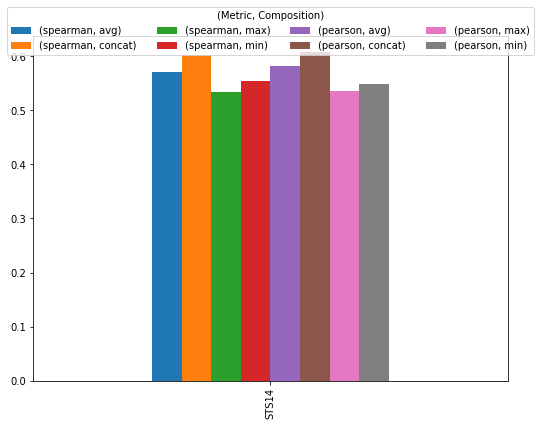

In [21]:
ax = STS_eam.unstack(level=0).plot(kind='bar', subplots=False)
ax.legend(title = "(Metric, Composition)", loc= 9, ncol=4, fancybox=True, bbox_to_anchor=(0.5, 1.1))
plt.tight_layout()
# plt.savefig("STS_eam.eps", dpi = 300)
plt.show()

In [22]:
# STS_updated_dict = {}
# for key, subtasks in STS.items():
#     for sets, scores in subtasks.items():
#         if sets == 'pearson':
#             STS_updated_dict[key] = scores * 100
#         try:
#             if isinstance(scores['pearson'], dict):
#                 print((key, (scores['pearson']['mean'])))
#                 STS_updated_dict[key] = scores['pearson']['mean'] * 100
#         except:
#             continue

In [23]:
# for key, value in STS_dict.items():
#     sum_ = 0.0
#     for sets in value:
#         if isinstance(sets[1], dict):
#             if isinstance(sets[1]['pearson'], dict):
#                 print((key, (sets[1]['pearson']['mean'])))
#                 STS_updated_dict[key] = sets[1]['pearson']['mean'] * 100
#         elif isinstance(sets[1], np.float64):
#             sum_ += sets[1]
#     avg = sum_*100/len(value) 
#     if key not in STS_updated_dict.keys():
#         STS_updated_dict[key] = avg
#     print(key, avg)